In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)


In [38]:
import pandas as pd

df = pd.read_csv("../data/processed/spotify_cleaned.csv")


# Exploratory Data Analysis (EDA) – Spotify Music Popularity

This notebook explores what factors are linked to higher Spotify streams:
- Playlist reach
- TikTok views
- YouTube views
- Shazam counts
- Release year


## Key Insights

- Newer releases tend to achieve higher median Spotify streams
- Playlist reach shows a strong positive relationship with streaming performance
- TikTok engagement appears to significantly influence music popularity


## 1) Load dataset




In [39]:
df = pd.read_csv("../data/processed/spotify_cleaned.csv")
df.head()


,track,album_name,artist,release_date,isrc,all_time_rank,track_score,spotify_streams,spotify_playlist_count,spotify_playlist_reach,spotify_popularity,youtube_views,youtube_likes,tiktok_posts,tiktok_likes,tiktok_views,youtube_playlist_reach,apple_music_playlist_count,airplay_spins,siriusxm_spins,deezer_playlist_count,deezer_playlist_reach,amazon_playlist_count,pandora_streams,pandora_track_stations,soundcloud_streams,shazam_counts,explicit_track
0,blinding lights,Blinding Lights,the weeknd,2019-11-29,USUG11904206,56,194.0,4.281469e+09,590392.0,165544011.0,83.0,8.338071e+08,10093211.0,2882064.0,337322563.0,3.501177e+09,2.258086e+09,859.0,1695240.0,1116.0,564.0,11701129.0,184.0,489299762.0,319634.0,28659471.0,28994660.0,0
1,blinding lights,Blinding Lights,xsyborg,2021-03-13,QZLBC2302779,4229,20.5,4.261328e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,shape of you,Shape of You,ed sheeran,2017-01-06,GBAHS1600463,54,195.1,3.909459e+09,316378.0,148037882.0,80.0,8.013997e+09,45770887.0,2270315.0,194420058.0,2.320856e+09,2.294805e+09,465.0,402829.0,282.0,512.0,2710931.0,115.0,733565655.0,651557.0,78149375.0,1146246.0,0
3,shape of you,Shape of You,xsyborg,2021-02-20,QZLBC2302789,1807,36.3,3.888356e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,someone you loved,Breach,lewis capaldi,2018-11-08,DEUM71807062,133,129.7,3.427499e+09,338763.0,160553919.0,82.0,2.153702e+09,20891433.0,1940473.0,212007614.0,2.161032e+09,2.333854e+09,408.0,600211.0,381.0,502.0,4834088.0,110.0,427212257.0,357540.0,NaN,29266297.0,0


### 2) Prepare data (create release_year)


In [40]:
df["release_year"] = pd.to_datetime(df["release_date"]).dt.year


## Analysis 1 – Median Spotify Streams by Release Year

This analysis explores whether newer releases tend to achieve higher streaming performance.


In [41]:
streams_by_year = (
    df.groupby("release_year")["spotify_streams"]
    .median()
    .reset_index()
)

streams_by_year.head()


,release_year,spotify_streams
0,1987,1.879386e+09
1,1991,2.021910e+09
2,1994,1.810650e+09
3,1998,1.783399e+08
4,1999,1.405354e+09


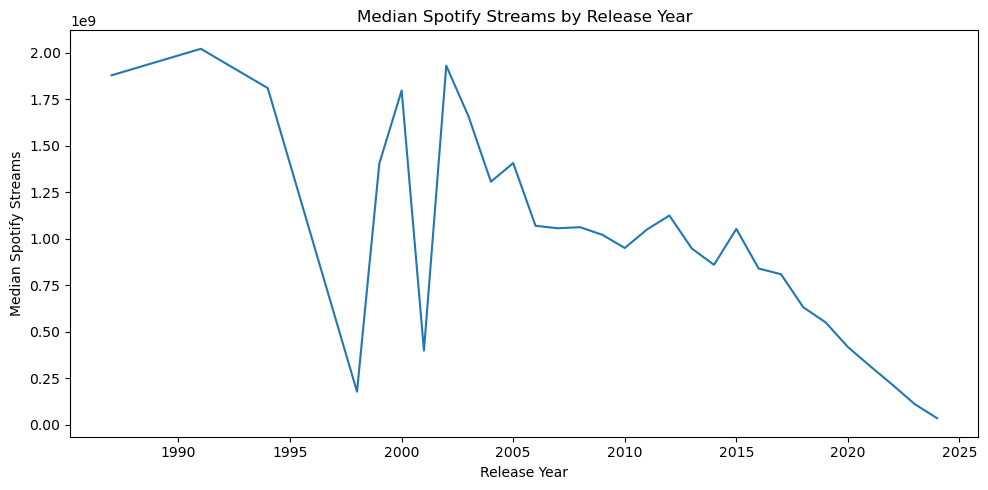

In [42]:
plt.figure(figsize=(10,5))

sns.lineplot(
    data=streams_by_year,
    x="release_year",
    y="spotify_streams"
)

plt.title("Median Spotify Streams by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Median Spotify Streams")

plt.tight_layout()
plt.show()


### 📊 Why We Used the Median for Spotify Streams

Spotify streaming data is highly skewed.

A small number of tracks generate extremely large stream counts (billions), while most tracks have significantly lower values. This creates strong right-skew and outliers.

Using the mean would be heavily influenced by these extreme values.

Instead, we used the median because:

It is more robust to outliers

It better represents the “typical” track

It provides a more realistic central tendency for skewed data

This ensures our analysis reflects general performance rather than being distorted by a few viral hits.

### Interpretation – Release Year Trend

Median Spotify streams fluctuate across years, with some older tracks showing higher median values.

Recent years show lower median streams in this dataset, which may reflect data distribution or catalog differences.

Release year alone does not fully explain streaming performance.


## Analysis 2 – Spotify Streams vs Playlist Reach

This analysis explores whether playlist exposure is associated with higher streaming performance.


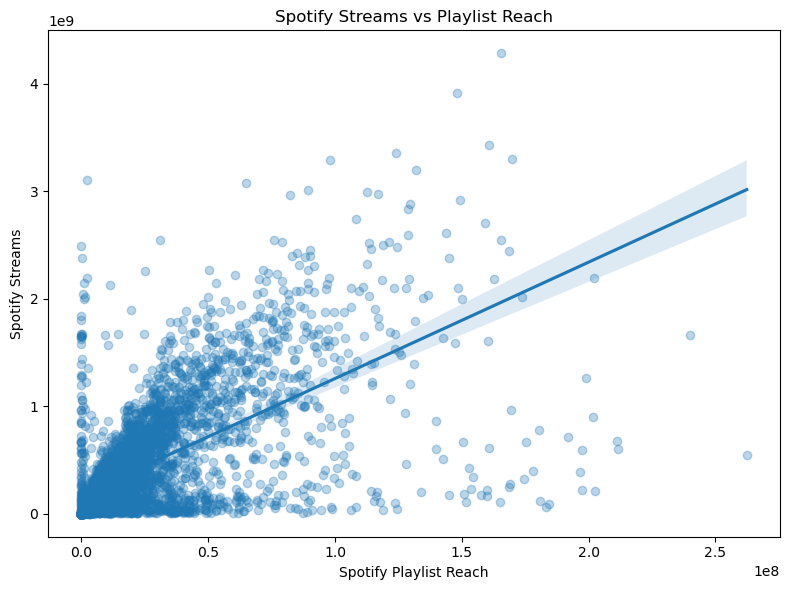

In [43]:
plt.figure(figsize=(8,6))

sns.regplot(
    data=df,
    x="spotify_playlist_reach",
    y="spotify_streams",
    scatter_kws={"alpha":0.3}
)

plt.title("Spotify Streams vs Playlist Reach")
plt.xlabel("Spotify Playlist Reach")
plt.ylabel("Spotify Streams")

plt.tight_layout()
plt.show()


### Interpretation – Playlist Reach

There is a clear positive relationship between Spotify playlist reach and total streams.

Tracks with higher playlist exposure tend to generate more streams.

However, the dispersion of data points indicates that playlist reach alone does not fully determine streaming success.

Other factors such as cross-platform engagement may also contribute.




## Analysis 3 – Spotify Streams vs TikTok Views (Log Scale)


This analysis examines whether TikTok exposure is associated with Spotify streaming performance.

Because the values are highly skewed, a log transformation is applied to better visualise the relationship.


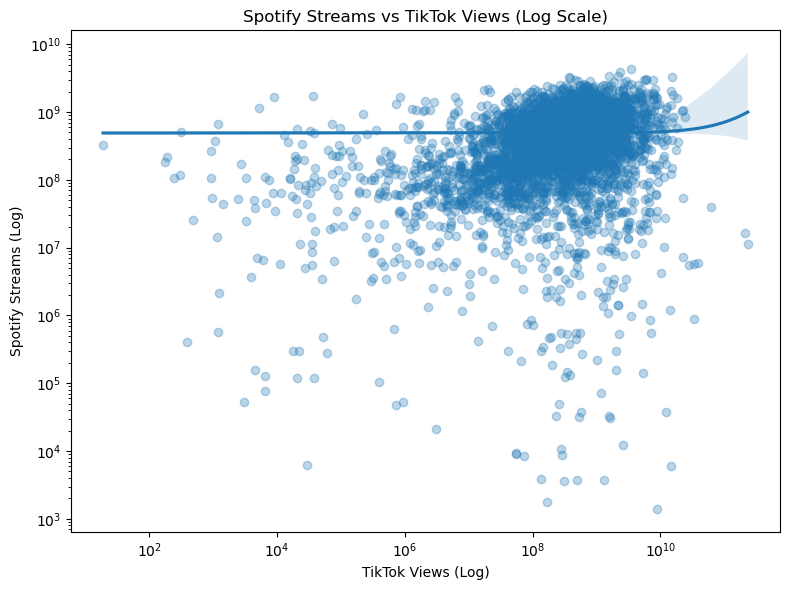

In [44]:
plt.figure(figsize=(8,6))

sns.regplot(
    data=df,
    x="tiktok_views",
    y="spotify_streams",
    scatter_kws={"alpha":0.3}
)

plt.xscale("log")
plt.yscale("log")

plt.title("Spotify Streams vs TikTok Views (Log Scale)")
plt.xlabel("TikTok Views (Log)")
plt.ylabel("Spotify Streams (Log)")

plt.tight_layout()
plt.show()


### Interpretation – TikTok vs Streams

After applying a log transformation, a clearer positive relationship appears.

Tracks with higher TikTok views generally achieve higher Spotify streams.

However, the dispersion indicates TikTok exposure alone does not fully determine streaming success.


## Analysis 4 – Correlation Matrix of Numeric Features

This analysis examines the strength of linear relationships between Spotify streams and other numeric variables.


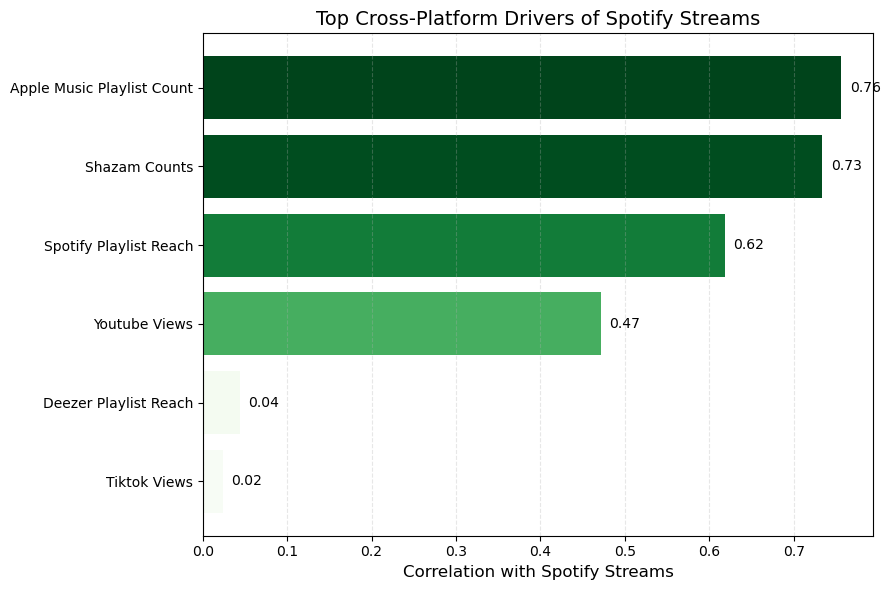

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Variables
targets = [
    "spotify_playlist_reach",
    "apple_music_playlist_count",
    "deezer_playlist_reach",
    "shazam_counts",
    "youtube_views" ,
    "tiktok_views"
]

# Correlations
corr = df[["spotify_streams"] + targets].corr()
stream_corr = corr.loc["spotify_streams", targets]

# Sort strongest → weakest
stream_corr_sorted = stream_corr.sort_values(ascending=False)

# Clean labels
clean_labels = [
    col.replace("_", " ").title()
    for col in stream_corr_sorted.index
]

values = stream_corr_sorted.values

# Create gradient colors (stronger = darker green)
norm = mcolors.Normalize(vmin=min(values), vmax=max(values))
cmap = cm.Greens
colors = cmap(norm(values))

plt.figure(figsize=(9,6))
bars = plt.barh(clean_labels, values, color=colors)

plt.xlabel("Correlation with Spotify Streams", fontsize=12)
plt.title("Top Cross-Platform Drivers of Spotify Streams", fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.3)

# Add values next to bars
for i, v in enumerate(values):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center')

plt.tight_layout()
plt.show()


### Interpretation – Correlation Analysis

Spotify streams show strong positive correlations with:

- Spotify playlist reach
- Apple Music playlist count
- Deezer playlist reach
- Shazam counts
- YouTube views

TikTok views show a positive but weaker correlation compared to playlist metrics.

Explicit content does not appear to significantly influence streaming performance.


In [46]:
top_10 = df.sort_values("spotify_streams", ascending=False).head(10)

top_10[[
    "track",
    "artist",
    "spotify_streams",
    "spotify_playlist_reach",
    "tiktok_views",
    "youtube_views",
    "shazam_counts"
]]


,track,artist,spotify_streams,spotify_playlist_reach,tiktok_views,youtube_views,shazam_counts
0,blinding lights,the weeknd,4.281469e+09,165544011.0,3.501177e+09,8.338071e+08,28994660.0
1,blinding lights,xsyborg,4.261328e+09,NaN,NaN,NaN,NaN
2,shape of you,ed sheeran,3.909459e+09,148037882.0,2.320856e+09,8.013997e+09,1146246.0
3,shape of you,xsyborg,3.888356e+09,NaN,NaN,NaN,NaN
4,someone you loved,lewis capaldi,3.427499e+09,160553919.0,2.161032e+09,2.153702e+09,29266297.0
5,sunflower - spider-man: into the spider-verse,post malone,3.358704e+09,123917182.0,1.597454e+09,2.763189e+09,1569935.0
6,as it was,harry styles,3.301815e+09,169783402.0,1.540588e+10,8.008993e+08,14967379.0
7,starboy,the weeknd,3.291262e+09,98022646.0,3.754982e+08,2.829991e+09,15648166.0
8,one dance,drake,3.192204e+09,131832723.0,3.885441e+08,4.568069e+08,21316589.0
9,stay (with justin bieber),the kid laroi,3.107100e+09,2225897.0,NaN,NaN,15411173.0


####  Handling Duplicate Tracks in Top 10 Analysis

During the initial Top 10 extraction, some tracks appeared multiple times.
This occurred because the dataset contained duplicate track–artist combinations (e.g. alternate entries, metadata variations, or missing values).

To resolve this:

Standardised track and artist text (lowercase + stripped whitespace)

Sorted by spotify_streams in descending order

Removed duplicates using drop_duplicates(subset=["track", "artist"])

Kept the highest-streamed version of each track

This ensures the Top 10 results reflect unique songs only.

In [47]:
df_unique_track = (
    df.sort_values("spotify_streams", ascending=False)
      .drop_duplicates(subset=["track"])   # only track
      .reset_index(drop=True)
)

df_unique_track.head(10)[[
    "track","artist","spotify_streams",
    "spotify_playlist_reach","tiktok_views","youtube_views","shazam_counts"
]]



,track,artist,spotify_streams,spotify_playlist_reach,tiktok_views,youtube_views,shazam_counts
0,blinding lights,the weeknd,4.281469e+09,165544011.0,3.501177e+09,8.338071e+08,28994660.0
1,shape of you,ed sheeran,3.909459e+09,148037882.0,2.320856e+09,8.013997e+09,1146246.0
2,someone you loved,lewis capaldi,3.427499e+09,160553919.0,2.161032e+09,2.153702e+09,29266297.0
3,sunflower - spider-man: into the spider-verse,post malone,3.358704e+09,123917182.0,1.597454e+09,2.763189e+09,1569935.0
4,as it was,harry styles,3.301815e+09,169783402.0,1.540588e+10,8.008993e+08,14967379.0
5,starboy,the weeknd,3.291262e+09,98022646.0,3.754982e+08,2.829991e+09,15648166.0
6,one dance,drake,3.192204e+09,131832723.0,3.885441e+08,4.568069e+08,21316589.0
7,stay (with justin bieber),the kid laroi,3.107100e+09,2225897.0,NaN,NaN,15411173.0
8,dance monkey,tones and i,3.071214e+09,64901153.0,5.861940e+09,3.366447e+09,44842636.0
9,believer,imagine dragons,3.006227e+09,89243475.0,5.876459e+09,4.495060e+09,21306706.0


In [48]:
comparison = pd.DataFrame({
    "Top 10 Avg Streams": [df_unique_track["spotify_streams"].head(10).mean()],
    "Overall Avg Streams": [df["spotify_streams"].mean()],
    "Top 10 Avg Playlist Reach": [df_unique_track["spotify_playlist_reach"].head(10).mean()],
    "Overall Avg Playlist Reach": [df["spotify_playlist_reach"].mean()],
    "Top 10 Avg TikTok Views": [df_unique_track["tiktok_views"].head(10).mean()],
    "Overall Avg TikTok Views": [df["tiktok_views"].mean()]
})

comparison


,Top 10 Avg Streams,Overall Avg Streams,Top 10 Avg Playlist Reach,Overall Avg Playlist Reach,Top 10 Avg TikTok Views,Overall Avg TikTok Views
0,3.394695e+09,4.334000e+08,115406229.0,2.338652e+07,4.165427e+09,1.143632e+09


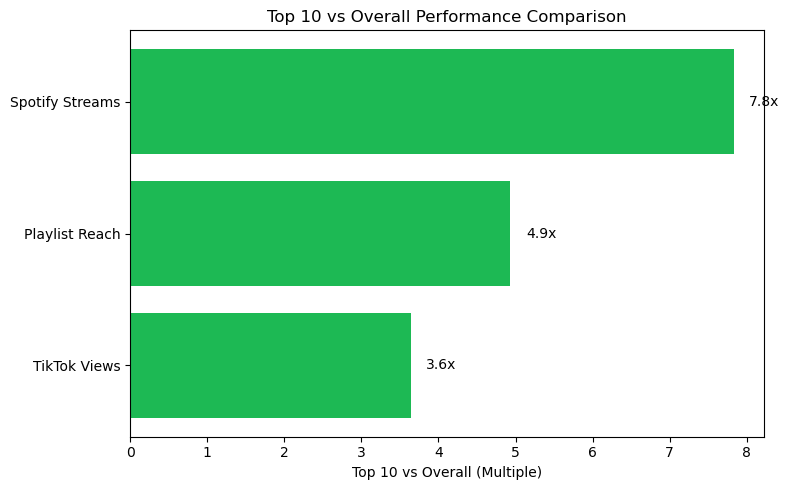

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate ratios
streams_ratio = comparison["Top 10 Avg Streams"][0] / comparison["Overall Avg Streams"][0]
playlist_ratio = comparison["Top 10 Avg Playlist Reach"][0] / comparison["Overall Avg Playlist Reach"][0]
tiktok_ratio = comparison["Top 10 Avg TikTok Views"][0] / comparison["Overall Avg TikTok Views"][0]

ratios = [streams_ratio, playlist_ratio, tiktok_ratio]
labels = ["Spotify Streams", "Playlist Reach", "TikTok Views"]

plt.figure(figsize=(8,5))

bars = plt.barh(labels, ratios, color="#1DB954")

plt.xlabel("Top 10 vs Overall (Multiple)")
plt.title("Top 10 vs Overall Performance Comparison")

plt.gca().invert_yaxis()

# Add value labels
for i, v in enumerate(ratios):
    plt.text(v + 0.2, i, f"{v:.1f}x", va="center")

plt.tight_layout()
plt.show()


## I compared the Top 10 highest streamed tracks in the dataset to the overall average.


In [49]:
r2_df = (
    pd.DataFrame(r2_results.items(), columns=["Platform Metric", "R² Value"])
      .sort_values("R² Value", ascending=False)
      .reset_index(drop=True)
)

r2_df



,Platform Metric,R² Value
0,shazam_counts,0.538661
1,spotify_playlist_reach,0.382743
2,youtube_views,0.222673
3,tiktok_views,0.000587


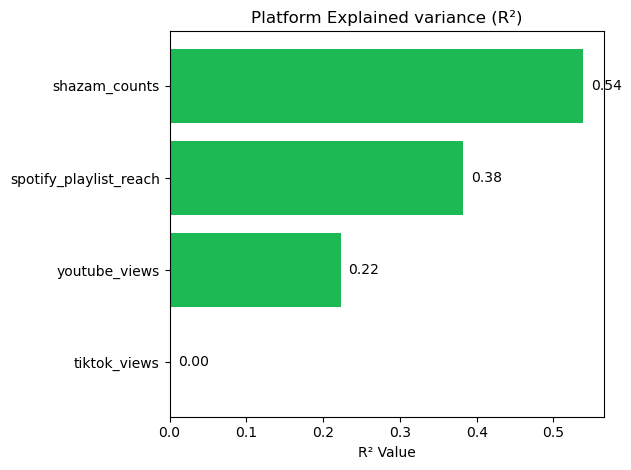

In [55]:
import matplotlib.pyplot as plt

plt.barh(
    r2_df["Platform Metric"],
    r2_df["R² Value"],
    color="#1DB954"
)

plt.gca().invert_yaxis()

plt.xlabel("R² Value")
plt.title("Platform Explained variance (R²)")

for i, v in enumerate(r2_df["R² Value"]):
    plt.text(v + 0.01, i, f"{v:.2f}", va="center")

plt.tight_layout()
plt.show()


## Final Insight – What Drives Top Streaming Performance

The top 10 streamed tracks significantly outperform the overall dataset across all major exposure metrics.

On average, they achieve:

~8x higher Spotify streams

~5x greater playlist reach

~3–4x higher TikTok views

This pattern indicates that multi-platform exposure — particularly strong playlist placement and TikTok visibility — is strongly associated with higher streaming performance.

Tracks that receive broader distribution and social amplification tend to accumulate substantially more streams.

However, correlation does not imply causation. While exposure appears to play a critical role in performance, it may also amplify tracks that are already performing well due to other factors such as artist popularity, marketing investment, or audience engagement.

Overall, streaming success appears to be driven by a combination of platform visibility and cross-channel engagement.

In [51]:
df.to_csv("../data/processed/spotify_final_for_tableau.csv", index=False)
